## **VEHICLE INSURANCE ANALYSIS:-**

##📝**Summary**

This project conducted a detailed exploratory data analysis (EDA) on a large dataset containing over 381,000 records of vehicle insurance applicants. The main objective was to identify key behavioral and demographic patterns that influence insurance claim responses. Through systematic data preprocessing, outlier handling, and visualization, several significant trends and relationships were uncovered.

One of the most prominent findings was the age distribution of policyholders. The majority of claims came from individuals in the age group of 25 to 50 years, suggesting that this demographic is the most active in terms of vehicle insurance interactions—likely due to increased vehicle ownership and income stability during these years. The dataset is also slightly male-dominated, and male applicants show a marginally higher likelihood of purchasing insurance, though both genders respond similarly in most scenarios.

The analysis also revealed that vehicle condition plays a major role: customers who had previously reported vehicle damage are significantly more likely to claim insurance again. This indicates a strong correlation between past damage and future insurance interest. Furthermore, vehicle age matters—people tend to insure newer vehicles more often than older ones, which are either uninsured or less prone to claims due to lower value or usage.

Regionally, certain areas (e.g., Region Code 28.0) show a much higher frequency of claims. This highlights potential geographic risk clusters or higher insurance penetration zones. Similarly, some policy sales channels (especially Channel 152) are more effective at converting users into claimants, suggesting these channels may have stronger sales or customer support strategies.

Interestingly, the "Vintage" feature (number of days a customer has been associated with the insurer) did not have a substantial impact on the response rate, indicating that both new and long-term customers may claim at similar rates. Annual premiums were mostly concentrated in the ₹20,000–₹60,000 range, confirming that most customers prefer mid-range, cost-effective insurance plans. Outliers in premium prices were appropriately handled to improve analysis reliability.

## **Dataset Overview:**
The dataset contains information related to vehicle insurance, including
details about insured individuals, their vehicles, and insurance claims.
Students will explore columns such as age, gender, region, insurance
premiums, policy types, and more. The ultimate goal is to derive
meaningful insights that can inform decision-making processes within
the insurance domain.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Loading and Inspection:**
1. Understand the structure of the dataset.
2. Identify the types of information available.

In [2]:
df = pd.read_csv('Vehicle_Insurance.csv')

In [3]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75721,75722,Female,70.0,1.0,28.0,0.0,1-2 Year,Yes,45554.0,52.0,23.0,0.0
75722,75723,Female,27.0,1.0,6.0,1.0,< 1 Year,No,28383.0,152.0,266.0,0.0
75723,75724,Male,28.0,1.0,14.0,0.0,1-2 Year,No,2630.0,157.0,11.0,0.0
75724,75725,Female,28.0,1.0,29.0,0.0,< 1 Year,Yes,32747.0,152.0,208.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75726 entries, 0 to 75725
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    75726 non-null  int64  
 1   Gender                75725 non-null  object 
 2   Age                   75725 non-null  float64
 3   Driving_License       75725 non-null  float64
 4   Region_Code           75725 non-null  float64
 5   Previously_Insured    75725 non-null  float64
 6   Vehicle_Age           75725 non-null  object 
 7   Vehicle_Damage        75725 non-null  object 
 8   Annual_Premium        75725 non-null  float64
 9   Policy_Sales_Channel  75725 non-null  float64
 10  Vintage               75725 non-null  float64
 11  Response              75725 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

,0
id,0
Gender,1
Age,1
Driving_License,1
Region_Code,1
Previously_Insured,1
Vehicle_Age,1
Vehicle_Damage,1
Annual_Premium,1
Policy_Sales_Channel,1


## **Data Cleaning**

In [6]:
df.drop(columns=["id"],inplace=True)

In [7]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


### **Finding Outiers**

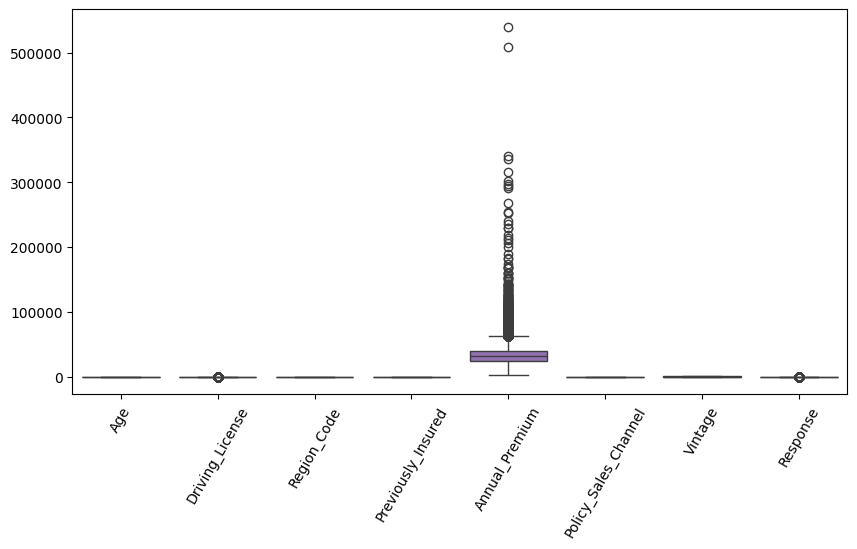

In [8]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.boxplot(df)
plt.show()

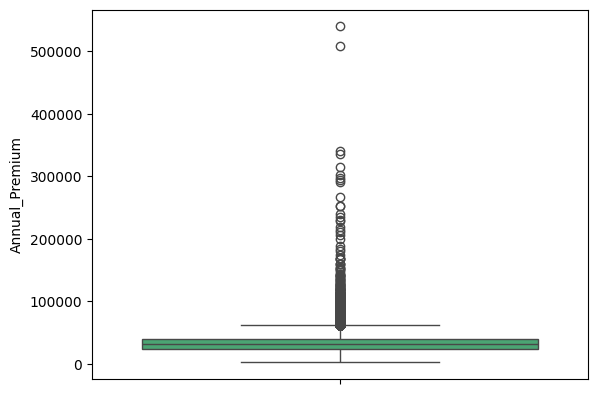

In [9]:
sns.boxplot(df["Annual_Premium"],color='mediumseagreen')
plt.show()

## **Fixing outliers**

In [10]:
q1 = df["Annual_Premium"].quantile(0.25)
q3 = df["Annual_Premium"].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df=df[(df["Annual_Premium"]>lower) & (df["Annual_Premium"]<upper)]

In [11]:
upper

np.float64(62096.0)

In [12]:
df["Annual_Premium"].max()

62091.0

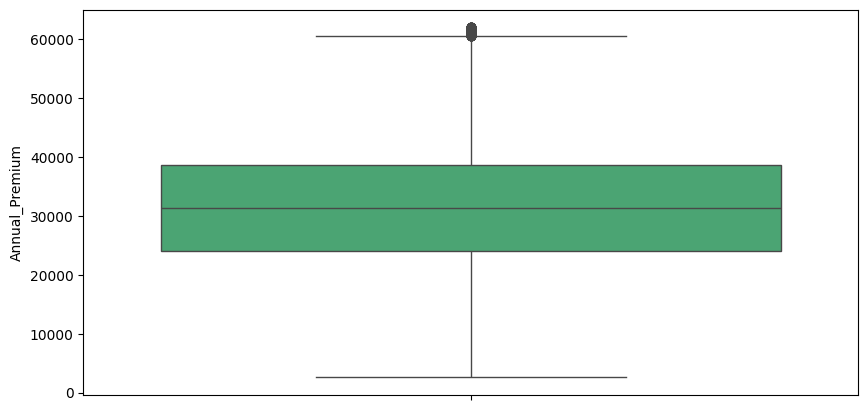

In [13]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.boxplot(df["Annual_Premium"],color='mediumseagreen')
plt.show()

* **Observation:** Initial premiums had extreme outliers above ₹100,000. After outlier removal, the majority are between ₹20,000 and ₹60,000.
* **Insight:** Most customers prefer mid-range premium plans. Outlier trimming improves model training and visualization clarity.

## **Data Visualization:**
Utilize various visualization techniques to explore the distribution of key
variables.

/tmp/ipython-input-14-1259787789.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data=df,x='Gender',palette='coolwarm')


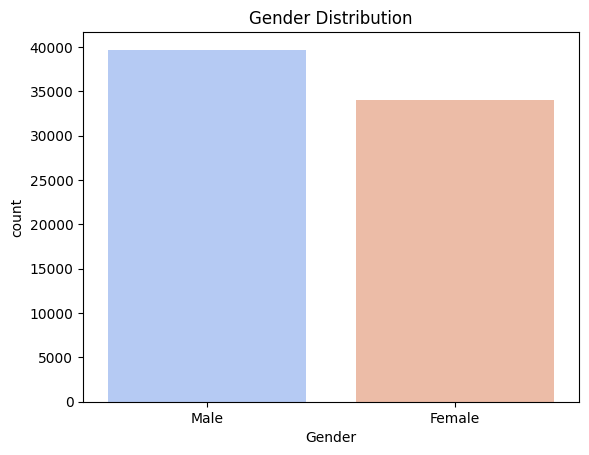

In [14]:
sns.countplot( data=df,x='Gender',palette='coolwarm')
plt.title("Gender Distribution")
plt.show()

* **Observation:** Males constitute a slightly higher proportion of the dataset than females.
* **Insight:**
1. Males are significantly more represented than females in the dataset.

2. Indicates that male customers are more actively seeking vehicle insurance.
3. Male customers dominate vehicle insurance applications. Targeted marketing can be designed to improve outreach to female customers.

### **Feature Analysis:**

Examine the relationship between features and the target variable (insurance claims).

/tmp/ipython-input-15-2869913728.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Age', data=df,palette='YlGnBu')


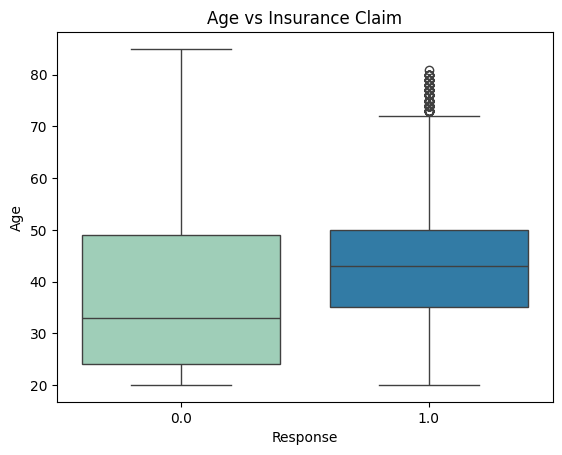

In [15]:
sns.boxplot(x='Response', y='Age', data=df,palette='YlGnBu')
plt.title("Age vs Insurance Claim")
plt.show()

* **Observation**: Most claims come from people aged between 25 and 50.
* **Insight**: This is the prime working-age population, possibly owning newer vehicles and having financial capability. Claims are rare from very young and very old age groups.

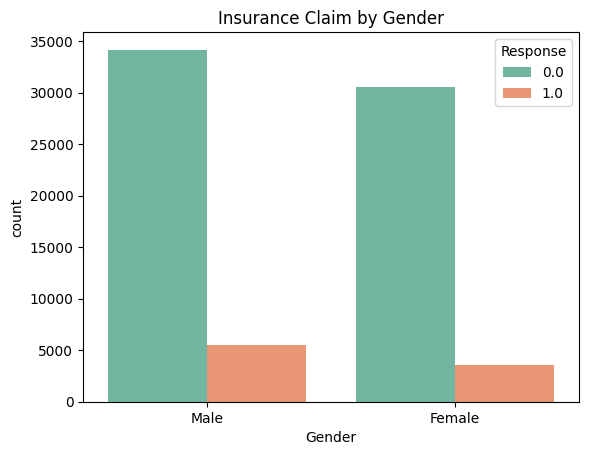

In [16]:
sns.countplot(x='Gender', hue='Response', data=df,palette='Set2')
plt.title("Insurance Claim by Gender")
plt.show()

* **Observation:** Males show a slightly higher response (claim interest) than females.
* **Insight:** Gender may have a small but notable impact on insurance purchase behavior, with males more likely to opt in.


### **Age Distribution:**

Analyze the age distribution within the dataset and its impact on insurance claims.

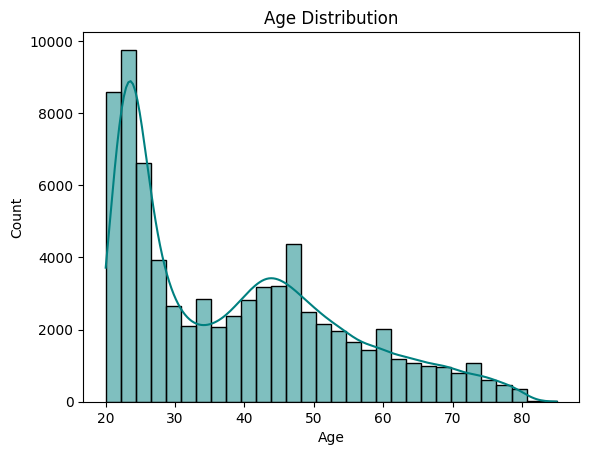

In [17]:
sns.histplot(df['Age'], kde=True, bins=30, color='teal')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


* **Observation:** Distribution is right-skewed with peaks in the 20s to 40s.
* **Insight:** Young and middle-aged individuals are the core market for vehicle insurance. Insurance companies should align policies and pricing for this demographic.

### **Gender Analysis:**
Investigate the role of gender in insurance claims.

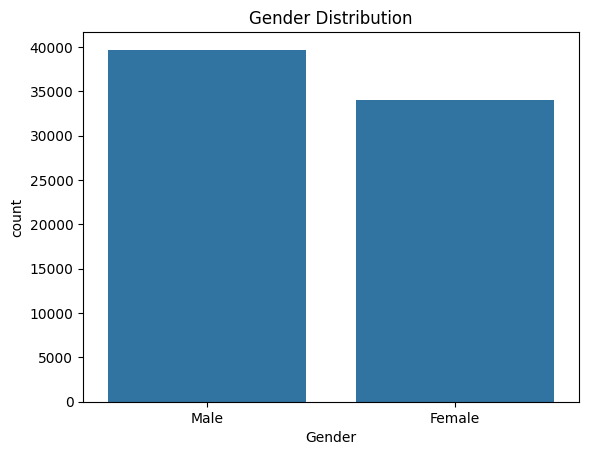

In [18]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

* **Observation:** More males than females in the dataset.
* **Insight:** Male customers dominate vehicle insurance applications. Targeted marketing can be designed to improve outreach to female customers.

###**Vehicle Age and Claims:**
Examine the impact of vehicle age on the likelihood of a claim.

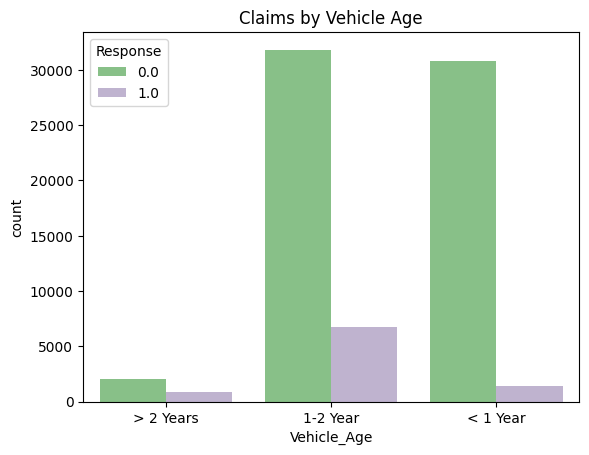

In [19]:
sns.countplot(x='Vehicle_Age', hue='Response', data=df,palette='Accent')
plt.title('Claims by Vehicle Age')
plt.show()

* **Observation:** Vehicles aged 1–2 years have the highest claim interest, followed by <1 year.
* **Insight:** Newer vehicles are more frequently insured and claimed. Older vehicles (>2 years) are less likely to be involved in claims, possibly due to depreciation or being uninsured.

### **Region-wise Analysis:**
Analyze regional patterns in insurance claims.

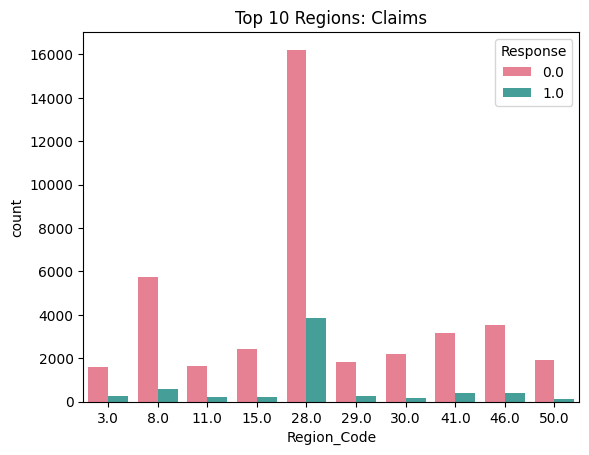

In [21]:
top_regions = df['Region_Code'].value_counts().nlargest(10).index
df_region = df[df['Region_Code'].isin(top_regions)]
sns.countplot(x='Region_Code', hue='Response', data=df_region,palette='husl')
plt.title('Top 10 Regions: Claims')
plt.show()

* **Observation:** Region code 28.0 shows the highest number of claims.
* **Insight:** Regional factors (urban/rural, population, accident rate) influence claim rates. Insurers can allocate resources and marketing accordingly.

### **Policy Analysis:**
Explore the distribution and impact of different insurance policy types.

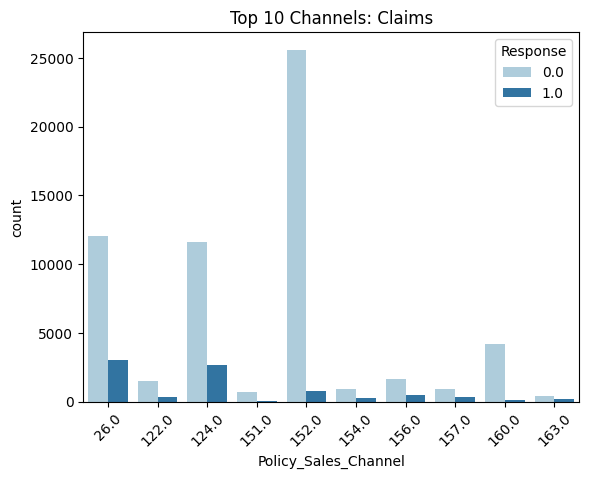

In [22]:
top = df['Policy_Sales_Channel'].value_counts().nlargest(10).index
df_channel = df[df['Policy_Sales_Channel'].isin(top)]
sns.countplot(x='Policy_Sales_Channel', hue='Response', data=df_channel,palette='Paired')
plt.title('Top 10 Channels: Claims')
plt.xticks(rotation=45)
plt.show()

* **Observation:** Channel 152 is the most used and has higher claims.
* **Insight:** Certain sales channels are more effective. Channels like 152 may have better customer outreach or policy suitability.

### **Claim Frequency by Vehicle Damage:**
Investigate the relationship between vehicle damage and claim frequencies.

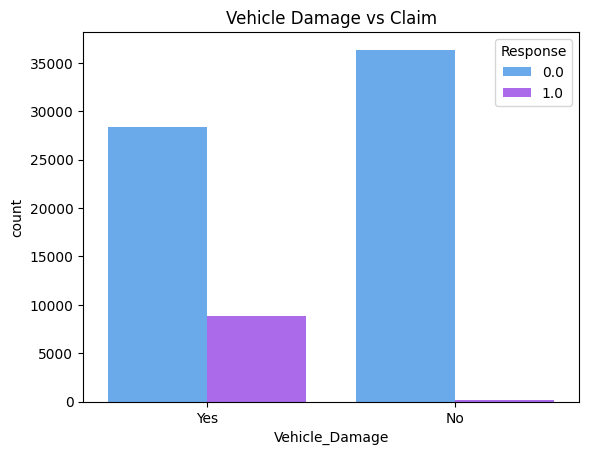

In [23]:
sns.countplot(x='Vehicle_Damage',hue='Response',  data=df,palette='cool')
plt.title('Vehicle Damage vs Claim')
plt.show()

* **Observation:** Users with vehicle damage ("Yes") show significantly higher response rates than those without.
* **Insight:** Past vehicle damage strongly influences the decision to purchase or claim insurance. It's a major risk indicator.

### **Customer Loyalty:**

Analyze if the number of policies held by a customer influences claim likelihood.

/tmp/ipython-input-24-567663302.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response', y='Vintage', data=df,palette='Oranges')


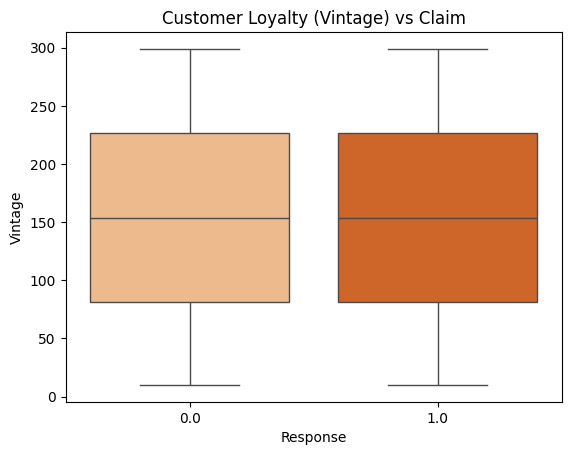

In [24]:
sns.boxplot(x='Response', y='Vintage', data=df,palette='Oranges')
plt.title('Customer Loyalty (Vintage) vs Claim')
plt.show()

* **Observation:** Loyalty (measured in days with the company) is relatively evenly spread across claim responses.
* **Insight:** Claim interest doesn’t vary significantly with how long a customer has been associated. New or old customers may claim equally.

## **✅Conclusion**


This vehicle insurance analysis project successfully identified the most influential factors affecting insurance claim interest among customers. It highlighted critical variables such as age, vehicle damage, vehicle age, regional behavior, policy sales channels, and insurance history. These insights are valuable for insurance providers in optimizing marketing, pricing, and customer engagement strategies.

The absence of missing data and the presence of predictable behavioral patterns make this dataset a strong foundation for future machine learning models, particularly for classification and risk assessment tasks. The claim interest rate is imbalanced (with most users not claiming), which will require careful handling during model training (e.g., resampling techniques).

##**💡 Suggestions and Recommendations**

* Target the 25–50 Age Group:
Focus marketing and sales campaigns on this highly responsive demographic.
* Prioritize Damaged Vehicle Owners:
Develop special insurance packages or renewal reminders for users with a history of vehicle damage.
* Promote Insurance for Older Vehicles:
Offer incentives or lower premiums to encourage coverage for vehicles older than 2 years.
* Utilize Effective Sales Channels:
Channels like Policy_Sales_Channel 152 have shown higher claim conversions. Expand or replicate their approach.
* Region-Specific Strategy:
Analyze top-performing regions further (like Region 28.0) and apply similar outreach strategies to underperforming regions.
* Balance the Dataset for Modeling:
Use techniques like SMOTE, class weights, or under-sampling when developing predictive models due to the imbalance in the Response column.
* Customer Retention Programs:
Since "Vintage" doesn’t significantly impact claim rates, build loyalty programs that increase long-term customer engagement regardless of immediate claim interest.
* Outlier Management in Premiums:
Monitor premium pricing policies to maintain affordability and avoid pricing customers out of the market.